# Histogram and Intensity Transformations

In [1]:
# Download the image for the lab
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

--2022-08-19 09:47:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K   254KB/s    in 1.8s    

2022-08-19 09:48:03 (254 KB/s) - ‘lenna.png’ saved [473831/473831]

--2022-08-19 09:48:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-course

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
def plot_image(image_1, image_2,title_1="Original", title_2 = "New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()

In [4]:
def plot_hist(old_image, new_image, title_old="Original", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1,2,1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1,2,2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

### Toy Example

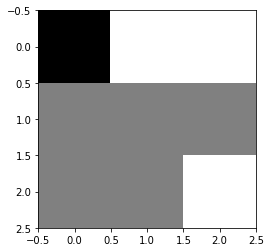

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [5]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

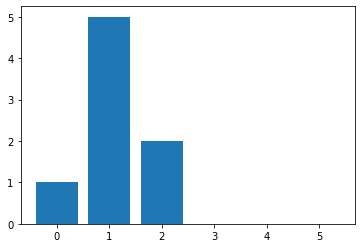

In [6]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

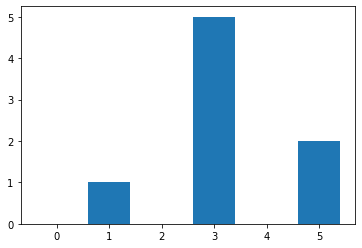

In [7]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

### Gray Scale Histograms

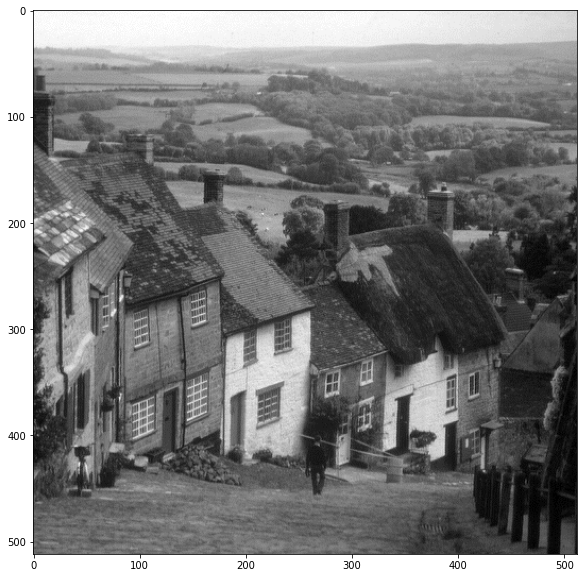

In [8]:
goldhill = cv2.imread("goldhill.bmp",cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill, cmap="gray")
plt.show()

In [9]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

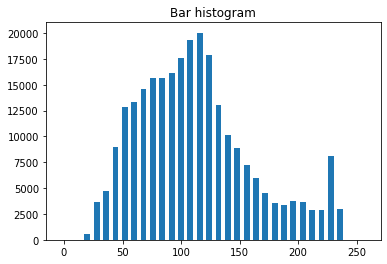

In [10]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [11]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

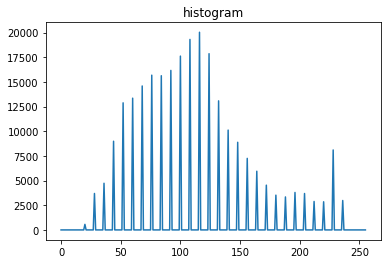

In [12]:
plt.plot(intensity_values, hist)
plt.title("histogram")
plt.show()

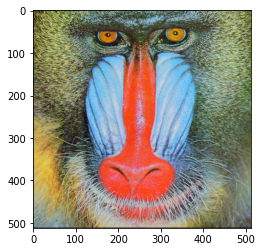

In [13]:
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

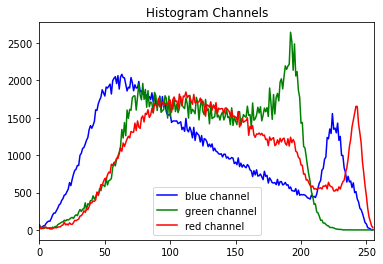

In [14]:
color = ('blue','green','red')
for i, col in enumerate(color):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values, histr, color = col, label=col+" channel")
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

### Intensity Transformations

### Image Negatives

In [15]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", neg_toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[255 253 253]
 [254 254 254]
 [254 254 253]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


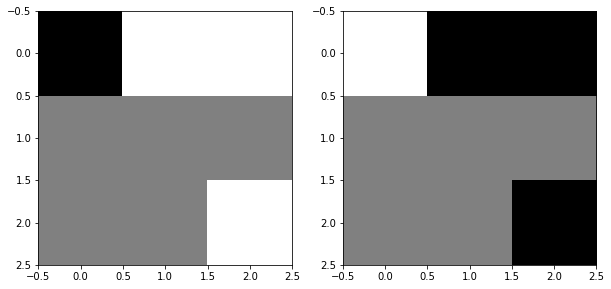

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(toy_image, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(neg_toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

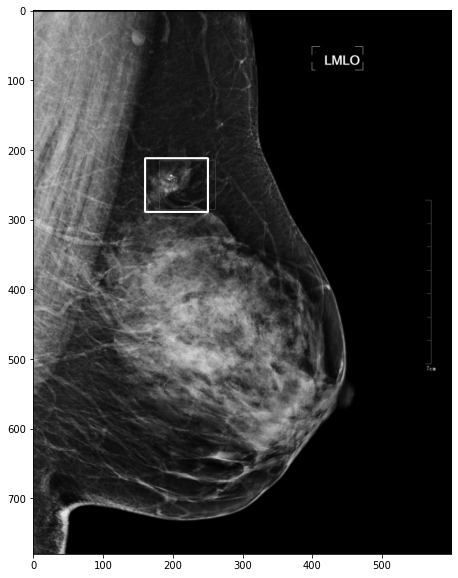

In [17]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color= (255), thickness=2)

plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [18]:
img_neg = -1  * image + 255

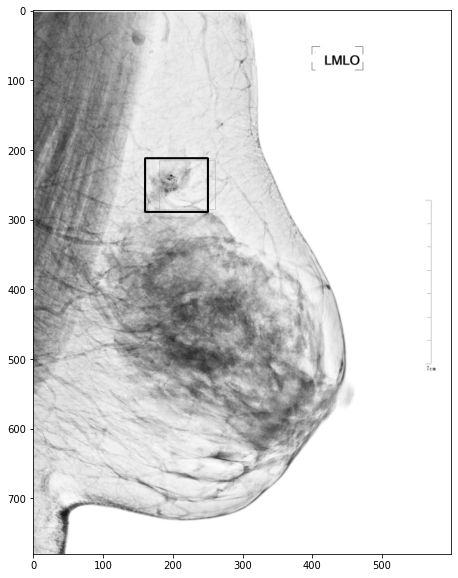

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap="gray")
plt.show()

### Brightness and contrast adjustments

In [20]:
alpha = 1 # Simple contrast control
beta = 100 # Simple brightness control 
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

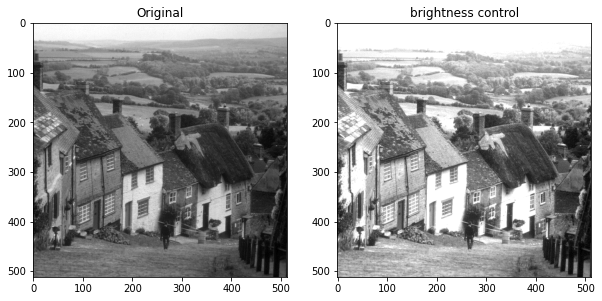

In [21]:
plot_image(goldhill, new_image, title_1="Original", title_2="brightness control")

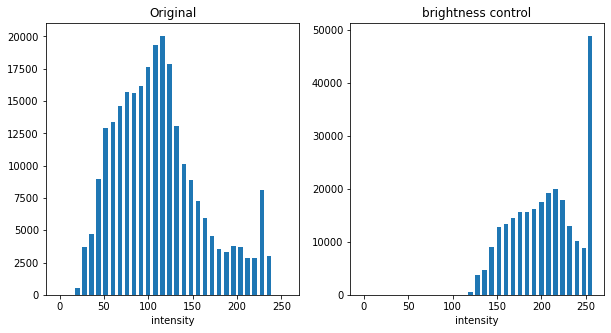

In [23]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Original", "brightness control")

In [24]:
plt.figure(figsize=(10,5))
alpha = 2 # Simple contrast control
beta = 0 # Simple brightness control 
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

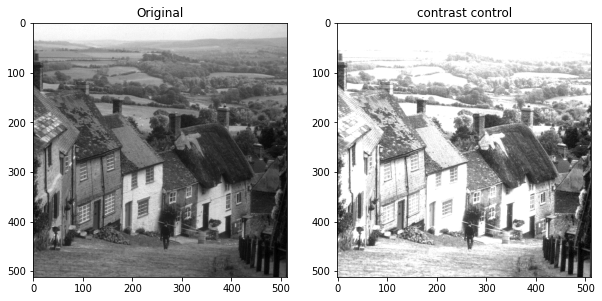

In [25]:
plot_image(goldhill, new_image, "Original","contrast control")

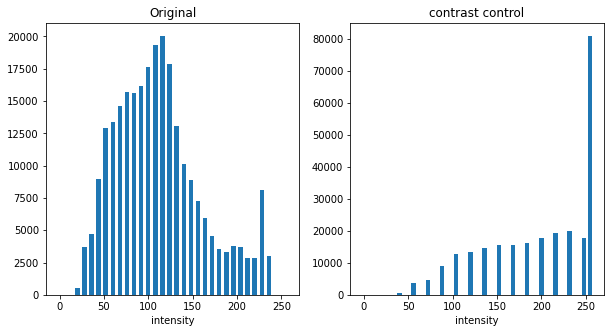

In [26]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Original","contrast control")

### Histogram Equalization

In [27]:
zelda = cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

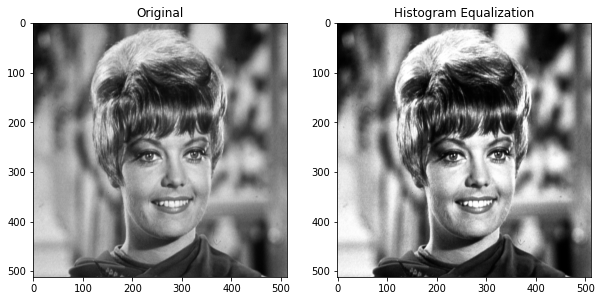

In [28]:
plot_image(zelda, new_image, "Original","Histogram Equalization")

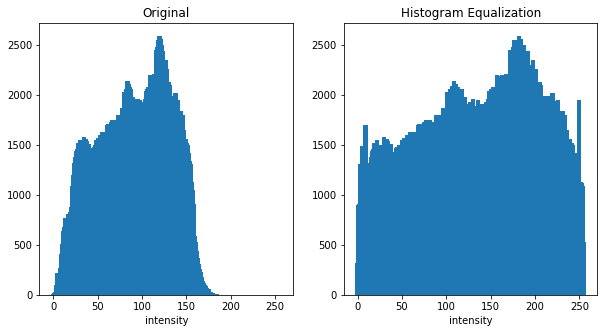

In [29]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image, "Original","Histogram Equalization")

### Thresholding and Simple Segmentation

In [30]:
def thresholding(input_img, threshold, max_value=255, min_value=0):
    N,M=input_img.shape
    image_out = np.zeros((N,M),dtype=np.uint8)
    
    for i in range(N):
        for j in range(M):
            if input_img[i,j]>threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out

In [31]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [32]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

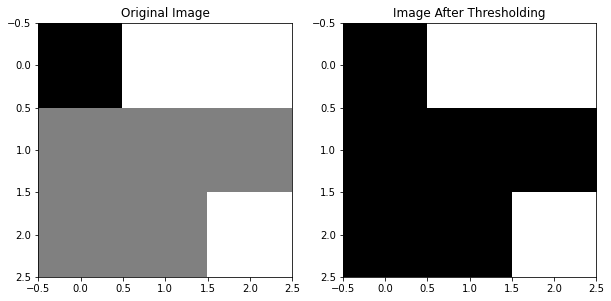

In [33]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

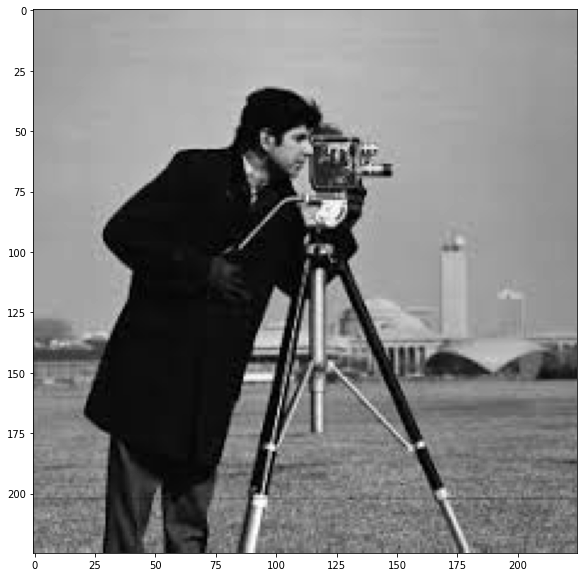

In [34]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.show()

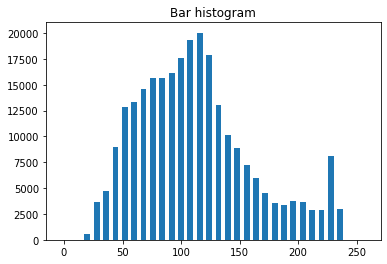

In [35]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [36]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value,min_value=min_value)

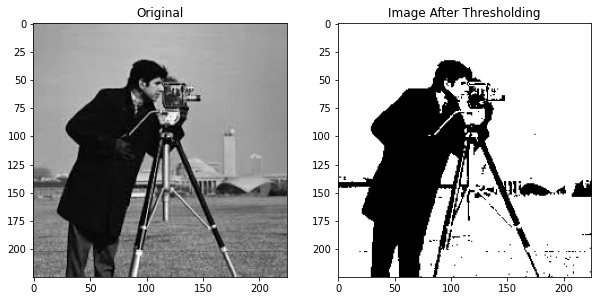

In [37]:
plot_image(image, new_image, "Original","Image After Thresholding")

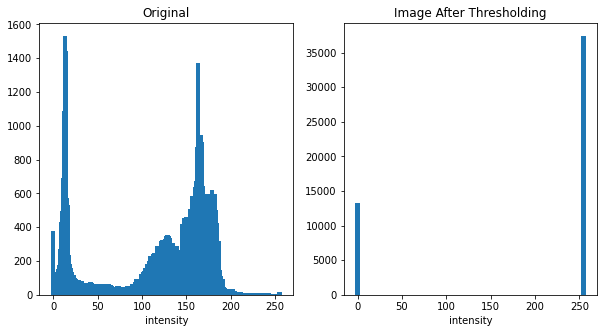

In [38]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Original","Image After Thresholding")

In [39]:
cv2.THRESH_BINARY

0

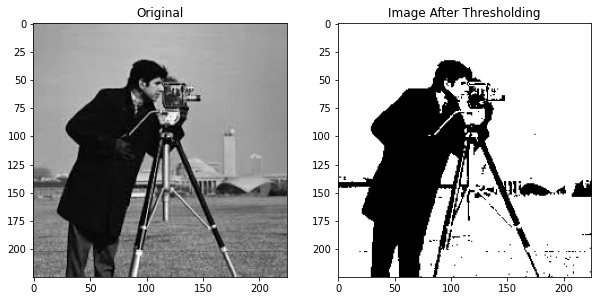

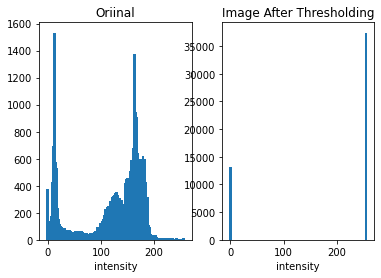

In [40]:
ret, new_image = cv2.threshold(image, threshold, max_value, cv2.THRESH_BINARY)
plot_image(image, new_image, "Original","Image After Thresholding")
plot_hist(image, new_image, "Oriinal","Image After Thresholding")

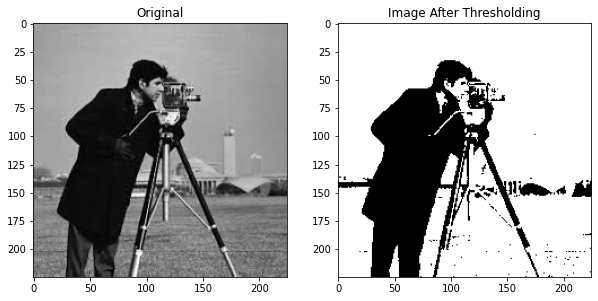

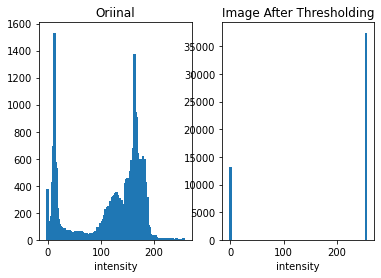

In [41]:
ret, new_image = cv2.threshold(image, 86, 255, cv2.THRESH_BINARY)
plot_image(image, new_image, "Original","Image After Thresholding")
plot_hist(image, new_image, "Oriinal","Image After Thresholding")

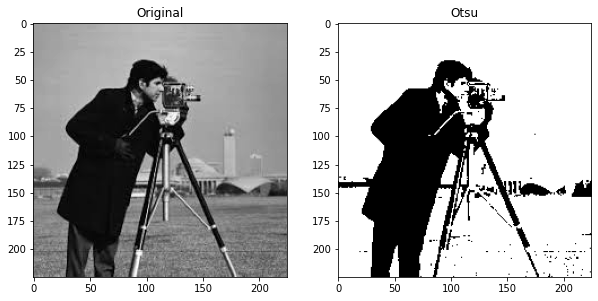

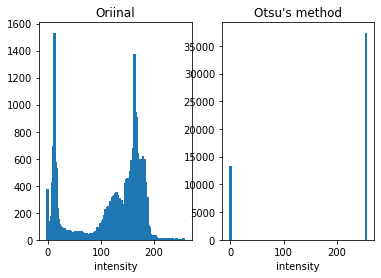

In [43]:
ret, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
plot_image(image, otsu, "Original","Otsu")
plot_hist(image, otsu, "Oriinal","Otsu's method")

In [44]:
ret

88.0